In [8]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header = None, names = col_names)

In [9]:
pima.head()
#pima.tail()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 )

/home/anmol-panda/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
#make predications for X_test
y_pred_class = logreg.predict(X_test)

In [20]:
#calculate the classification accuracy
from sklearn import metrics
classification_accuracy = metrics.accuracy_score(y_test, y_pred_class)
print classification_accuracy

0.692708333333


In [22]:
#examine the class districbution of the testing set i.e no of ones and zeroes in this case
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [25]:
#percentage of ones
y_test.mean()

0.3229166666666667

In [26]:
#percentage of zeroes
1 - y_test.mean()

0.6770833333333333

In [27]:
max(y_test.mean(), 1- y_test.mean())

0.6770833333333333

In [28]:
#calculate Null accuracy for classiication problems with more than two classes
y_test.value_counts().head(1)/len(y_test)

0    0.677083
Name: label, dtype: float64

In [29]:
#confusion matrix: frist arg is true values (y_test from real data), second arg is set of values predicted by the model
print metrics.confusion_matrix(y_test, y_pred_class)

[[118  12]
 [ 47  15]]


In [35]:
print "True: ", y_test.values[0:25]
print "Pred: ", y_pred_class[0:25]

True:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred:  [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [38]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1,1]
TN = confusion[0,0]
FN = confusion[1,0]
FP = confusion[0,1]
print TP
print TN
print FN
print FP

15
118
47
12


In [39]:
#Classification Accuracy (Maximize)
print (TP + TN)/ float(TP + TN + FP +FN)
print metrics.accuracy_score(y_test, y_pred_class)

0.692708333333
0.692708333333


In [41]:
#Classification Error (Minimize)
print (FN + FP)/ float(TP +TN + FN + FP)
print 1 - metrics.accuracy_score(y_test, y_pred_class)

0.307291666667
0.307291666667


In [42]:
#Sensitivity (Maximize)
print TP / float(TP + FN)
print metrics.recall_score(y_test, y_pred_class)

0.241935483871
0.241935483871


In [43]:
#Specificity (Maximize)
print TN / float(TN + FP)

0.907692307692


In [45]:
#False Positive Rate (When the actual value is negative, how often is the predication worng) - (Minimize)
print FP / float(FP + TN)

0.203389830508


In [46]:
#Precision Rate : When a positive value is predicted, how often is the prediction correct
print TP / float(FP + TP)
print metrics.precision_score(y_test, y_pred_class)

0.555555555556
0.555555555556


In [47]:
#print the first ten predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [49]:
#print the first ten predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [50]:
logreg.predict_proba(X_test)[0:10, 1]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [54]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print y_pred_prob

[ 0.36752429  0.28356344  0.28895886  0.4141062   0.15896027  0.17065156
  0.49889026  0.51341541  0.27678612  0.67189438  0.35755557  0.74087965
  0.36050235  0.23012363  0.42654231  0.19103515  0.45763601  0.1190141
  0.43928953  0.36961151  0.44187989  0.37611662  0.19816022  0.41677304
  0.15548281  0.2531671   0.09743077  0.69633712  0.15358309  0.2197836
  0.43094832  0.34216058  0.22396114  0.38073543  0.13342134  0.38790216
  0.47049703  0.16204743  0.29548176  0.30918161  0.27299705  0.38816583
  0.27353443  0.28881041  0.63471914  0.02365251  0.15820648  0.23018375
  0.3484593   0.27580041  0.33264104  0.24880596  0.74489512  0.39001464
  0.41625545  0.13575687  0.18895376  0.64777682  0.18922131  0.05685904
  0.63991547  0.46636382  0.1250972   0.26957602  0.24919104  0.30570396
  0.46376224  0.20963095  0.42847829  0.40762264  0.20169096  0.27027066
  0.26255856  0.57238263  0.45467041  0.27716152  0.58001281  0.41599488
  0.27276101  0.34099223  0.54626578  0.37930723  0.2

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

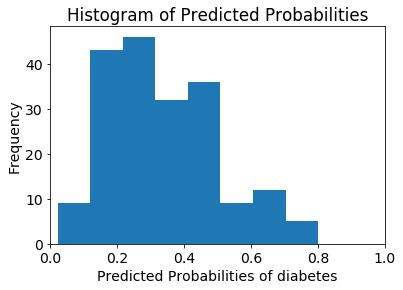

In [53]:
plt.hist(y_pred_prob, bins = 8)
plt.xlim(0,1)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probabilities of diabetes')
plt.ylabel('Frequency')

In [55]:
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob, 0.3)[0]

/home/anmol-panda/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [56]:
y_pred_prob[0:10]

array([ 0.36752429,  0.28356344,  0.28895886,  0.4141062 ,  0.15896027,
        0.17065156,  0.49889026,  0.51341541,  0.27678612,  0.67189438])

In [57]:
y_pred_class[0:10]

array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.])

In [58]:
print confusion

[[118  12]
 [ 47  15]]


In [59]:
print metrics.confusion_matrix(y_test, y_pred_class)

[[80 50]
 [16 46]]


In [60]:
print 46 / float(46 + 16)

0.741935483871


In [62]:
print 80 / float(80 + 50)

0.615384615385


In [76]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

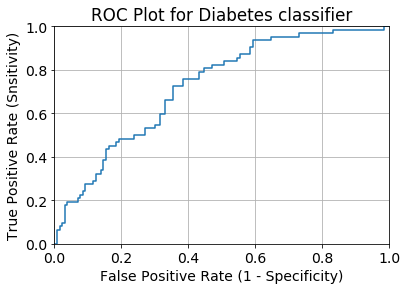

In [77]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Plot for Diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Snsitivity)')
plt.grid(True)

In [78]:
def evaluate_threshold(threshold):
    print "Sensitivity: ", tpr[thresholds > threshold][-1]
    print "Specificity: ", 1 - fpr[thresholds > threshold][-1]

In [79]:
evaluate_threshold(0.5)

Sensitivity:  0.241935483871
Specificity:  0.907692307692


In [81]:
evaluate_threshold(0.3)

Sensitivity:  0.725806451613
Specificity:  0.615384615385


In [82]:
evaluate_threshold(0.2)

Sensitivity:  0.951612903226
Specificity:  0.353846153846


In [84]:
evaluate_threshold(0.25)

Sensitivity:  0.838709677419
Specificity:  0.453846153846


In [87]:
print metrics.roc_auc_score(y_test, y_pred_prob)

0.724565756824


In [88]:
#calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv = 10, scoring = 'roc_auc').mean()


0.73782336182336183